<a href="https://colab.research.google.com/github/shiitake-is-cool/shiitake/blob/main/MLtest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import make_blobs
X,y=make_blobs(
random_state=0,
n_features=2,
centers=2,
cluster_std=1,
n_samples=300)

In [10]:
import pandas as pd
df = pd.DataFrame(X)
df["target"]=y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


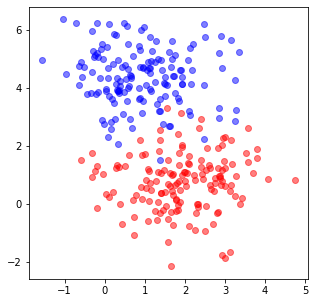

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df0= df[df["target"]==0]
df1= df[df["target"]==1]
plt.figure(figsize=(5,5))
plt.scatter(df0[0],df0[1],color="b",alpha=0.5)
plt.scatter(df1[0],df1[1],color="r",alpha=0.5)
plt.show()